1. code here for transform url text to number token for build model LSTM

In [ ]:
#training_labels = np.array(training_labels)
#testing_labels = np.array(testing_labels)


In [ ]:
import csv
import json

# Path to the CSV file
csv_file_path = '/content/drive/MyDrive/Capstone Project/Dataset/Fix_all_URL_phiseye.csv'

# Path to save the JSON file
json_file_path = '/content/drive/MyDrive/Capstone Project/Dataset/data.json'

# Read data from the CSV file and convert it to a JSON object
data = []
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        data.append(row)

# Write the data to a JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

print("CSV file converted to JSON successfully.")


CSV file converted to JSON successfully.


In [ ]:
!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Dataset/malicious_phish.csv')
df.head(10)

,Category,URL
0,benign,mp3raid.com/music/krizz_kaliko.html
1,benign,bopsecrets.org/rexroth/cr/1.htm
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife
5,benign,allmusic.com/album/crazy-from-the-heat-r16990
6,benign,corporationwiki.com/Ohio/Columbus/frank-s-bens...
7,benign,myspace.com/video/vid/30602581
8,benign,quickfacts.census.gov/qfd/maps/iowa_map.html
9,benign,nugget.ca/ArticleDisplay.aspx?archive=true&e=1...


1. preparing dataset, split dataset.

In [ ]:
print(df.shape)
df.head()

(67607, 2)


,Category,URL
0,benign,mp3raid.com/music/krizz_kaliko.html
1,benign,bopsecrets.org/rexroth/cr/1.htm
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife


In [ ]:
df["Category"].value_counts()

benign        49682
defacement    12381
phishing       3932
malware        1612
Name: Category, dtype: int64

In [ ]:
# adding column feature url category
df["url_category"] = df["Category"].replace({
    'benign':0,
    'defacement':1,
    'phishing':2,
    'malware':3
});

In [ ]:
df.head()

,Category,URL,url_category
0,benign,mp3raid.com/music/krizz_kaliko.html,0
1,benign,bopsecrets.org/rexroth/cr/1.htm,0
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...,0
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush,0
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife,0


In [ ]:
# adding column feature length url

In [ ]:
def get_url_length(url):
    # Remove common prefixes
    prefixes = ['http://', 'https://']
    for prefix in prefixes:
        if url.startswith(prefix):
            url = url[len(prefix):]

    # Remove 'www.' if present
    url = url.replace('www.', '')

    # Return the length of the remaining URL
    return len(url)

In [ ]:
df['URL_len'] = df['URL'].apply(lambda x: get_url_length(str(x)))

In [ ]:
df.head()

,Category,URL,url_category,URL_len
0,benign,mp3raid.com/music/krizz_kaliko.html,0,35
1,benign,bopsecrets.org/rexroth/cr/1.htm,0,31
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,111
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush,0,45
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife,0,46


In [ ]:
import tldextract
from urllib.parse import urlparse

def extract_pri_domain(url):
    try:
        res = tldextract.extract(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [ ]:
df['pri_domain'] = df['URL'].apply(lambda x: extract_pri_domain(x))

In [ ]:
df.head()

,Category,URL,url_category,URL_len,pri_domain
0,benign,mp3raid.com/music/krizz_kaliko.html,0,35,None
1,benign,bopsecrets.org/rexroth/cr/1.htm,0,31,None
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,111,None
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush,0,45,None
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife,0,46,None


In [ ]:
import string


def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits

def count_special_chars(url):
    special_chars = set(string.punctuation)
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

In [ ]:
df['letters_count']        = df['URL'].apply(lambda x: count_letters(x))
df['digits_count']         = df['URL'].apply(lambda x: count_digits(x))
df['special_chars_count']  = df['URL'].apply(lambda x: count_special_chars(x))

In [ ]:
df.head()

,Category,URL,url_category,URL_len,pri_domain,letters_count,digits_count,special_chars_count
0,benign,mp3raid.com/music/krizz_kaliko.html,0,35,None,29,1,5
1,benign,bopsecrets.org/rexroth/cr/1.htm,0,31,None,25,1,5
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,111,None,93,1,24
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush,0,45,None,31,4,10
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife,0,46,None,40,0,6


In [ ]:
import re

def has_shortening_service(url):
    pattern = re.compile(r'https?://(?:www\.)?(?:\w+\.)*(\w+)\.\w+')
    match = pattern.search(url)

    if match:
        domain = match.group(1)
        common_shortening_services = ['bit', 'goo', 'tinyurl', 'ow', 't', 'is',
                                      'cli', 'yfrog', 'migre', 'ff', 'url4', 'twit',
                                      'su', 'snipurl', 'short', 'BudURL', 'ping',
                                      'post', 'Just', 'bkite', 'snipr', 'fic',
                                      'loopt', 'doiop', 'short', 'kl', 'wp',
                                      'rubyurl', 'om', 'to', 'bit', 't', 'lnkd',
                                      'db', 'qr', 'adf', 'goo', 'bitly', 'cur',
                                      'tinyurl', 'ow', 'bit', 'ity', 'q', 'is',
                                      'po', 'bc', 'twitthis', 'u', 'j', 'buzurl',
                                      'cutt', 'u', 'yourls', 'x', 'prettylinkpro',
                                      'scrnch', 'filoops', 'vzturl', 'qr', '1url',
                                      'tweez', 'v', 'tr', 'link', 'zip']

        if domain.lower() in common_shortening_services:
            return 1
    return 0

In [ ]:
df['shortened']  = df['URL'].apply(lambda x: has_shortening_service(x))

In [ ]:
df.head()

,Category,URL,url_category,URL_len,pri_domain,letters_count,digits_count,special_chars_count,shortened
0,benign,mp3raid.com/music/krizz_kaliko.html,0,35,None,29,1,5,0
1,benign,bopsecrets.org/rexroth/cr/1.htm,0,31,None,25,1,5,0
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,111,None,93,1,24,0
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush,0,45,None,31,4,10,0
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife,0,46,None,40,0,6,0


In [ ]:
def abnormal_url(url):
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc
    if netloc:
        netloc = str(netloc)
        match = re.search(netloc, url)
        if match:
            return 1
    return 0

In [ ]:
df['abnormal_url']  = df['URL'].apply(lambda x: abnormal_url(x))

In [ ]:
df.head()

,Category,URL,url_category,URL_len,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url
0,benign,mp3raid.com/music/krizz_kaliko.html,0,35,None,29,1,5,0,0
1,benign,bopsecrets.org/rexroth/cr/1.htm,0,31,None,25,1,5,0,0
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,111,None,93,1,24,0,1
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush,0,45,None,31,4,10,0,0
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife,0,46,None,40,0,6,0,0


In [ ]:
def secure_http(url):
    return int(urlparse(url).scheme == 'https')


In [ ]:
df['secure_http']  = df['URL'].apply(lambda x: secure_http(x))


In [ ]:
import ipaddress
def have_ip_address(url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.hostname:
            ip = ipaddress.ip_address(parsed_url.hostname)
            return isinstance(ip, (ipaddress.IPv4Address, ipaddress.IPv6Address))
    except ValueError:
        pass  # Invalid hostname or IP address

    return 0

In [ ]:
df['have_ip']  = df['URL'].apply(lambda x: have_ip_address(x))

In [ ]:
df.head()

,Category,URL,url_category,URL_len,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip
0,benign,mp3raid.com/music/krizz_kaliko.html,0,35,None,29,1,5,0,0,0,0
1,benign,bopsecrets.org/rexroth/cr/1.htm,0,31,None,25,1,5,0,0,0,0
2,benign,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,111,None,93,1,24,0,1,0,0
3,benign,espn.go.com/nba/player/_/id/3457/brandon-rush,0,45,None,31,4,10,0,0,0,0
4,benign,yourbittorrent.com/?q=anthony-hamilton-soulife,0,46,None,40,0,6,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67607 entries, 0 to 67606
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Category             67607 non-null  object
 1   URL                  67607 non-null  object
 2   url_category         67607 non-null  int64 
 3   URL_len              67607 non-null  int64 
 4   pri_domain           0 non-null      object
 5   letters_count        67607 non-null  int64 
 6   digits_count         67607 non-null  int64 
 7   special_chars_count  67607 non-null  int64 
 8   shortened            67607 non-null  int64 
 9   abnormal_url         67607 non-null  int64 
 10  secure_http          67607 non-null  int64 
 11  have_ip              67607 non-null  object
dtypes: int64(8), object(4)
memory usage: 6.2+ MB


In [ ]:
df.shape

(67607, 12)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Category', 'URL', 'url_category', 'URL_len', 'pri_domain',
       'letters_count', 'digits_count', 'special_chars_count', 'shortened',
       'abnormal_url', 'secure_http', 'have_ip'],
      dtype='object')

In [ ]:
data = df.drop(columns=['URL','Category','pri_domain'])
data.head()

,url_category,URL_len,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip
0,0,35,29,1,5,0,0,0,0
1,0,31,25,1,5,0,0,0,0
2,0,111,93,1,24,0,1,0,0
3,0,45,31,4,10,0,0,0,0
4,0,46,40,0,6,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['url_category'])
y = data['url_category']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
x_train_array = x_train.values.astype(np.float32)
x_test_array = x_test.values.astype(np.float32)

# Mengonversi y_train, y_test ke array NumPy
y_train_array = y_train.values.astype(np.float32)
y_test_array = y_test.values.astype(np.float32)

In [ ]:
print(x_train_array)

[[ 84.  74.   1. ...   1.   0.   0.]
 [ 29.  23.   2. ...   0.   0.   0.]
 [ 26.  24.   0. ...   0.   0.   0.]
 ...
 [ 47.  49.   0. ...   1.   0.   0.]
 [ 83.  73.   0. ...   0.   0.   0.]
 [102.  84.   3. ...   1.   0.   0.]]


In [ ]:
print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (47324, 8)
Y_train Shape : (47324,)
X_test  Shape : (20283, 8)
Y_test  Shape : (20283,)


In [ ]:
import tensorflow as tf


# Parameters

lstm_dim = 32
dense_dim = 16
max_length = 128
embedding_dim = 300
vocab_size= 40000

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Set the training parameters
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         12000000  
                                                                 
 bidirectional_6 (Bidirecti  (None, 64)                85248     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 12086356 (46.11 MB)
Trainable params: 12086356 (46.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history_lstm = model_lstm.fit(x_train_array, y_train_array, epochs=10, validation_data=(x_test_array, y_test_array))

Epoch 1/10
1479/1479 [==============================] - 25s 13ms/step - loss: 0.7976 - accuracy: 0.7355 - val_loss: 0.7963 - val_accuracy: 0.7332
Epoch 2/10
1479/1479 [==============================] - 16s 11ms/step - loss: 0.7904 - accuracy: 0.7356 - val_loss: 0.7968 - val_accuracy: 0.7332
Epoch 3/10
1479/1479 [==============================] - 17s 11ms/step - loss: 0.7894 - accuracy: 0.7356 - val_loss: 0.7995 - val_accuracy: 0.7332
Epoch 4/10
1479/1479 [==============================] - 17s 11ms/step - loss: 0.7885 - accuracy: 0.7356 - val_loss: 0.7975 - val_accuracy: 0.7332
Epoch 5/10
1479/1479 [==============================] - 16s 11ms/step - loss: 0.7877 - accuracy: 0.7356 - val_loss: 0.7991 - val_accuracy: 0.7332
Epoch 6/10
1479/1479 [==============================] - 16s 11ms/step - loss: 0.7864 - accuracy: 0.7355 - val_loss: 0.7999 - val_accuracy: 0.7332
Epoch 7/10
1479/1479 [==============================] - 16s 11ms/step - loss: 0.7844 - accuracy: 0.7357 - val_loss: 0.8020 -

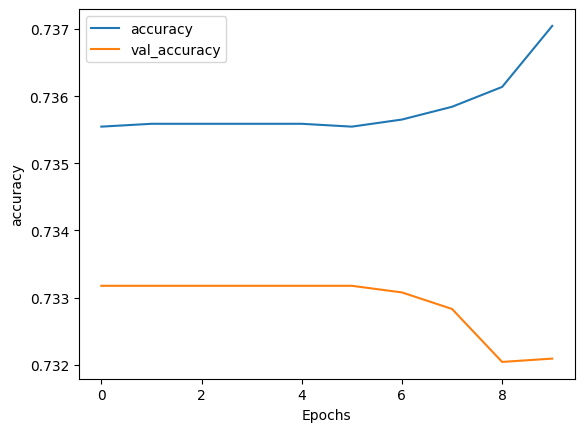

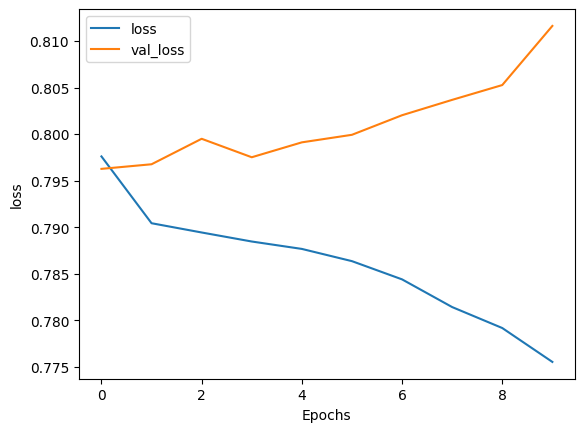

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')